<a href="https://colab.research.google.com/github/ckiekim/Colab/blob/main/Keras_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN - MNIST 손글씨

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

In [3]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [4]:
def create_generator():
    generator = Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(0.2),
        Dense(512),
        LeakyReLU(0.2),
        Dense(1024),
        LeakyReLU(0.2),
        Dense(784, activation='tanh')
    ])
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator

In [5]:
def create_discriminator():
    discriminator=Sequential([
        Dense(1024, input_dim=784),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(512),
        LeakyReLU(0.2),
        Dropout(0.3),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

In [6]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [7]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise = np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise).reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image {epoch:03d}.png')

In [8]:
from tensorflow.keras.utils import plot_model

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
X_train = x_train.reshape(60000, 784)
X_train.shape

(60000, 784)

In [10]:
batch_size=128
batch_count = X_train.shape[0] / batch_size

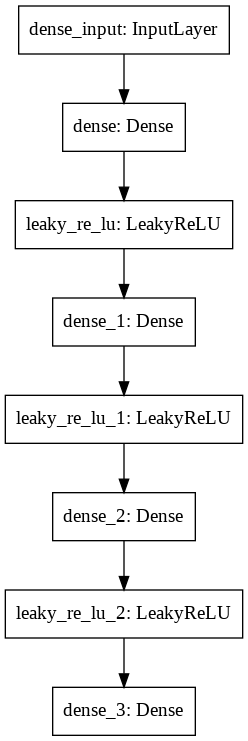

In [11]:
generator = create_generator()
plot_model(generator)

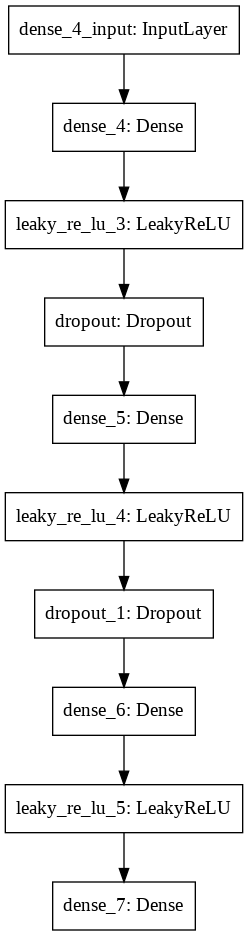

In [12]:
discriminator = create_discriminator()
plot_model(discriminator)

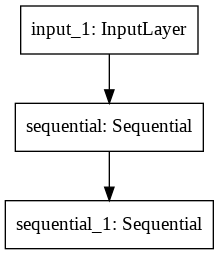

In [13]:
gan = create_gan(discriminator, generator)
plot_model(gan)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
261 262 263 264 265 266 267 268 269 270 271 272 273 274

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


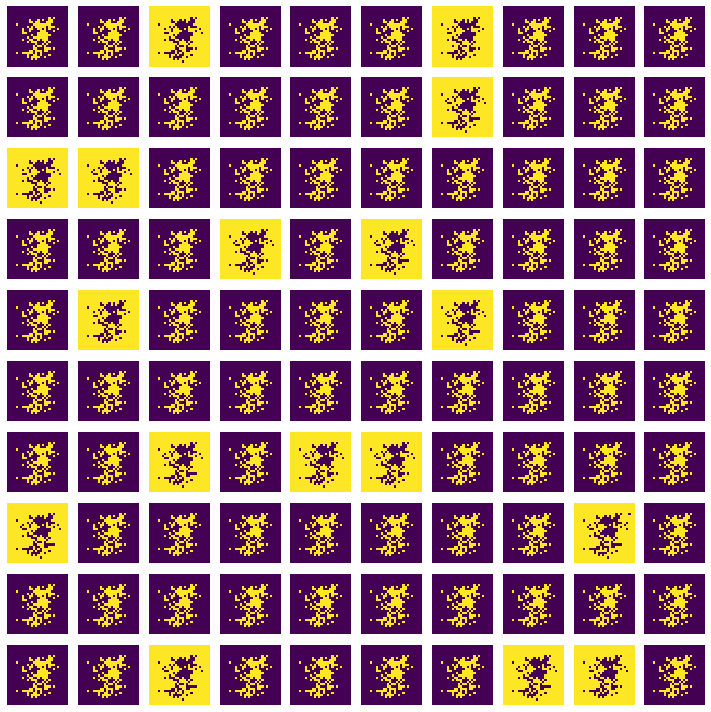

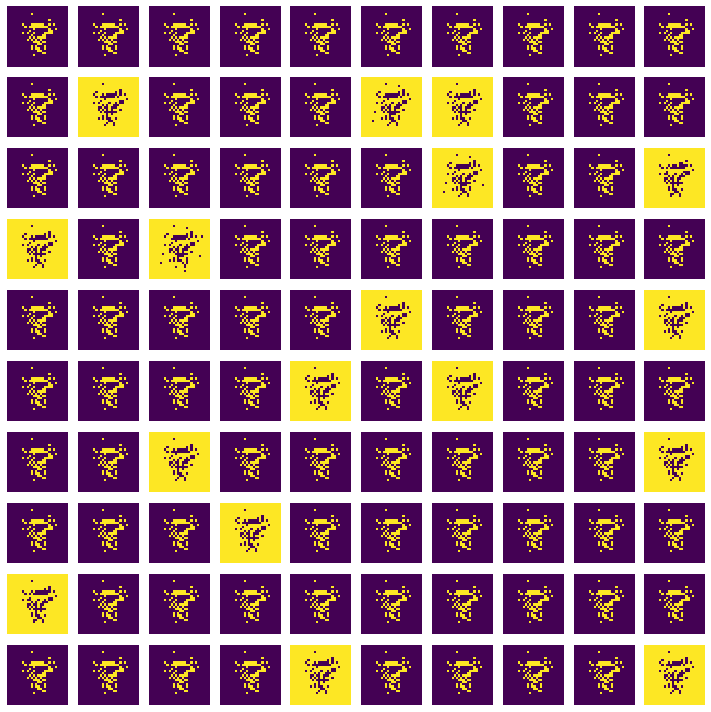

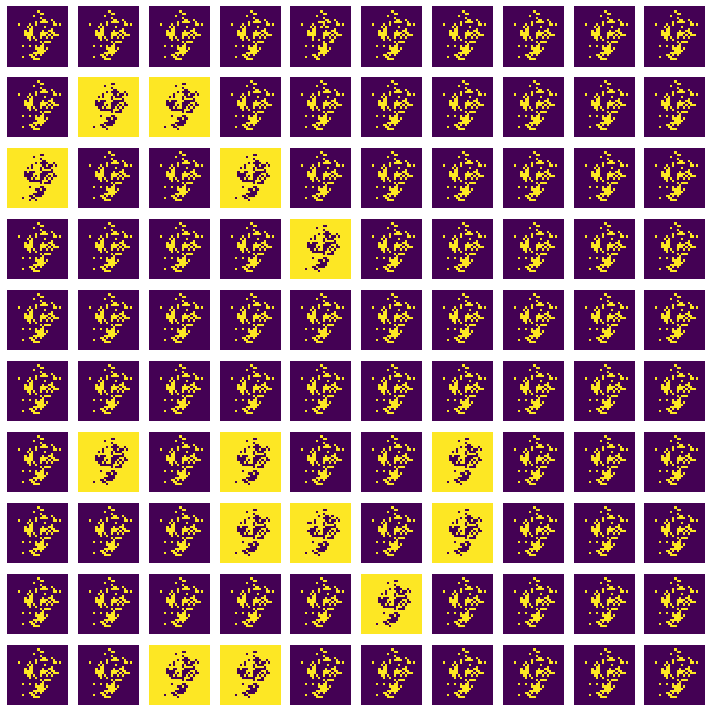

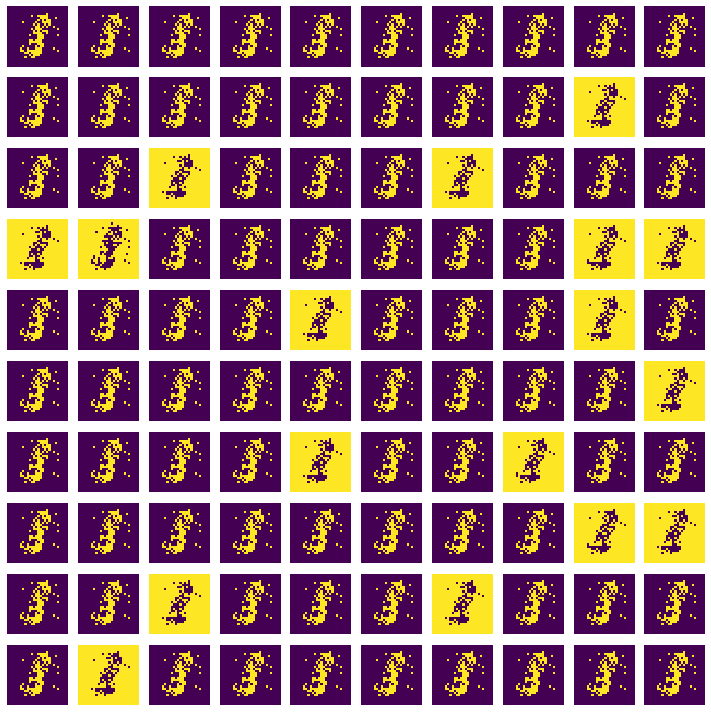

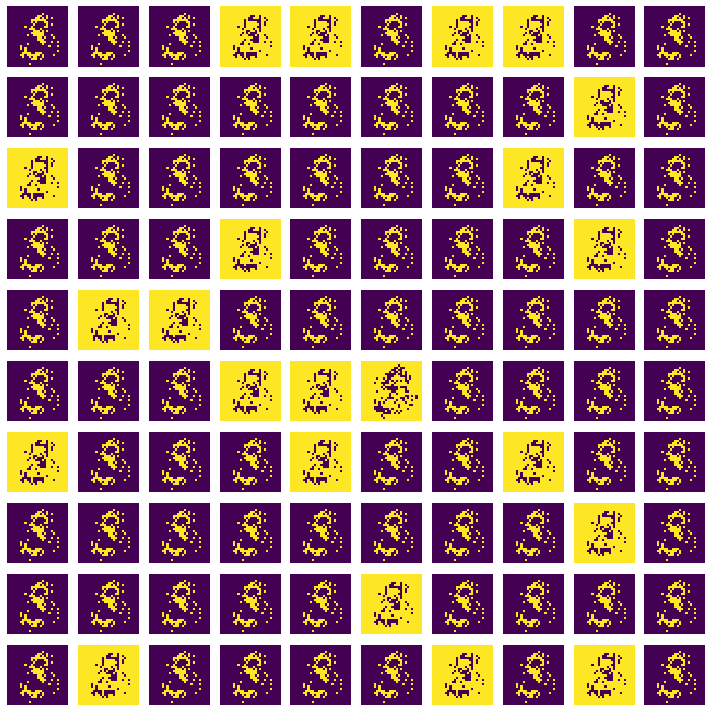

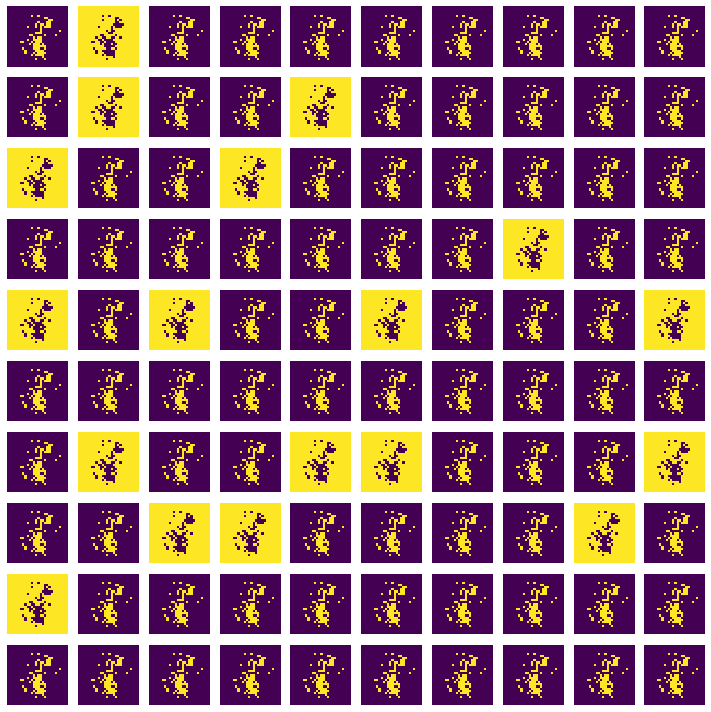

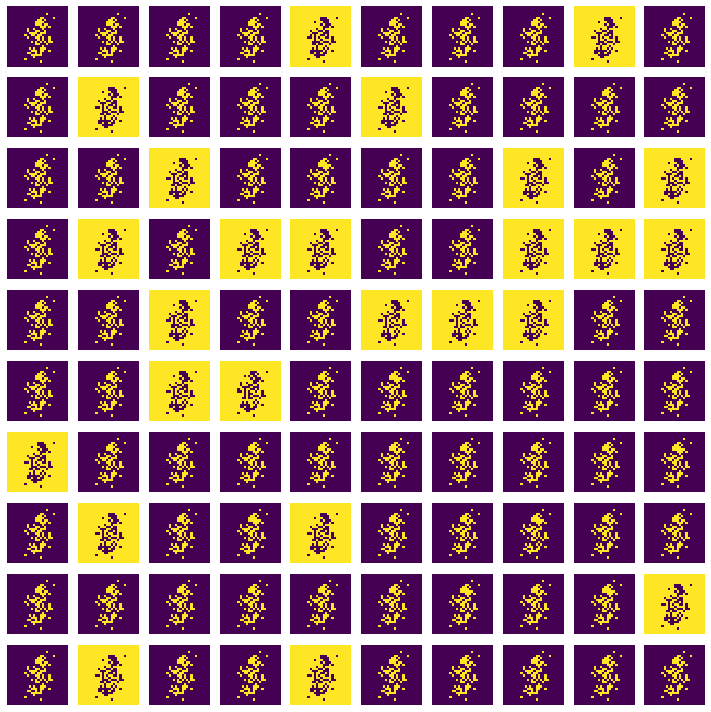

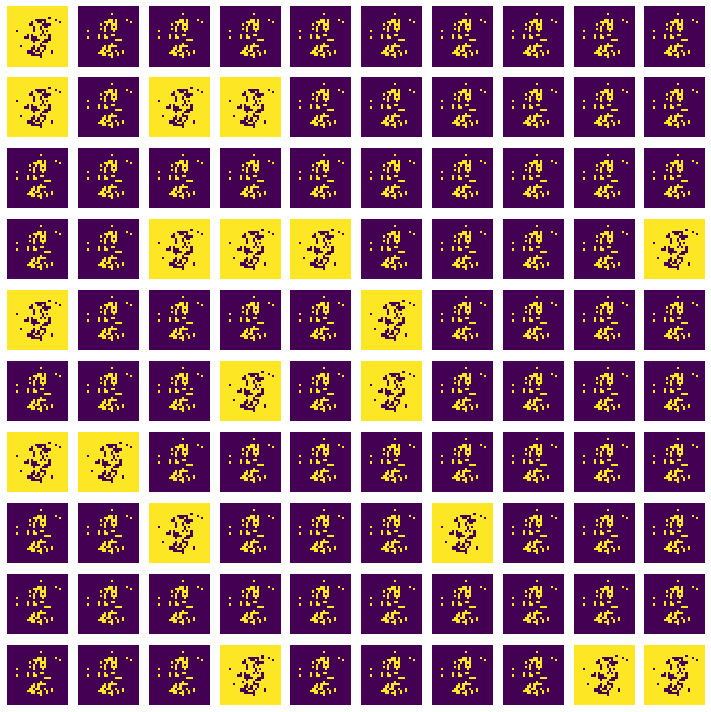

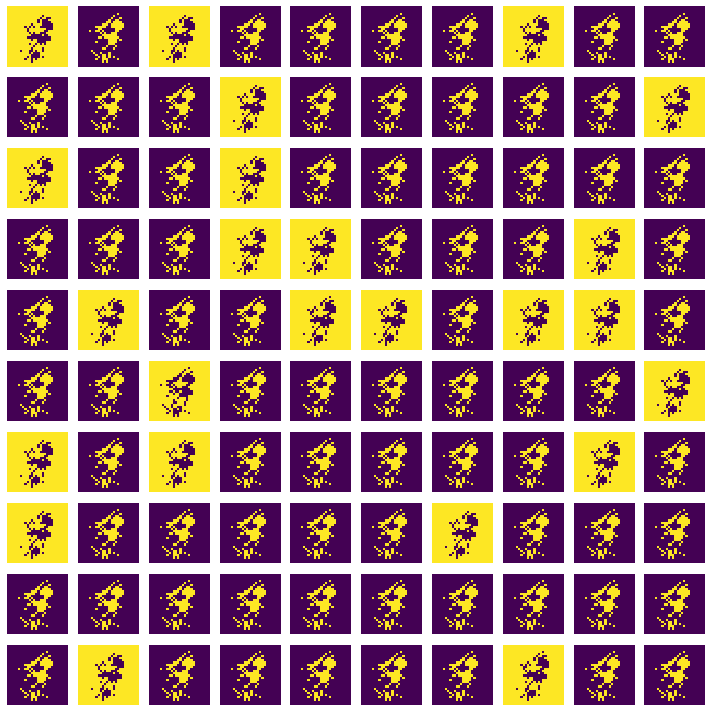

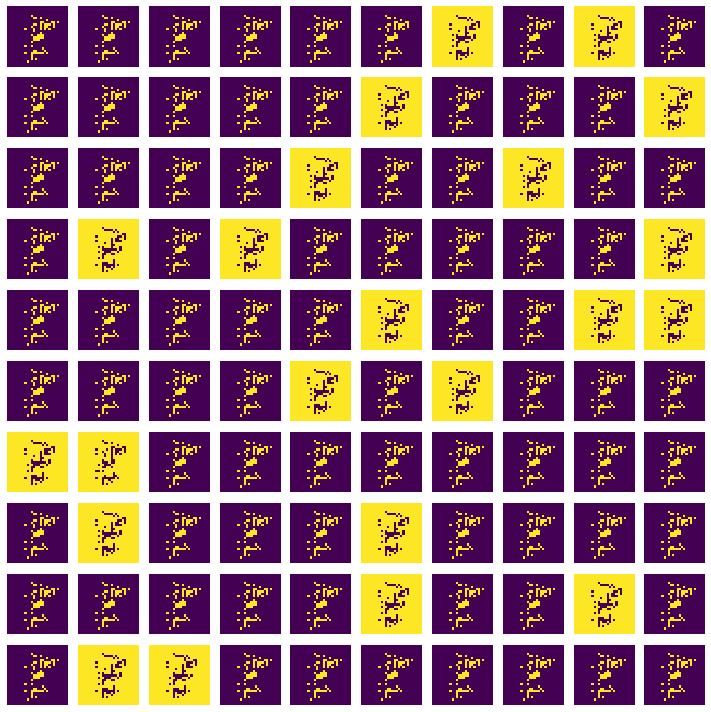

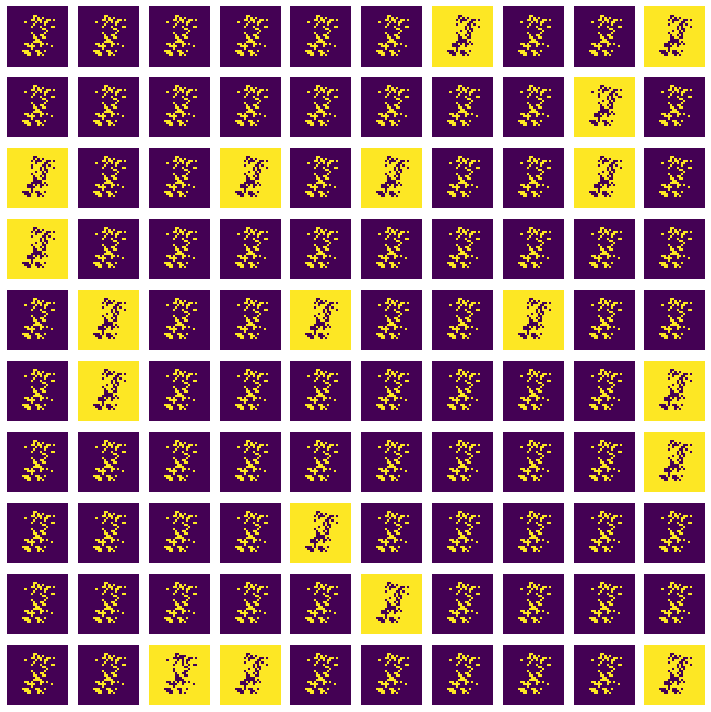

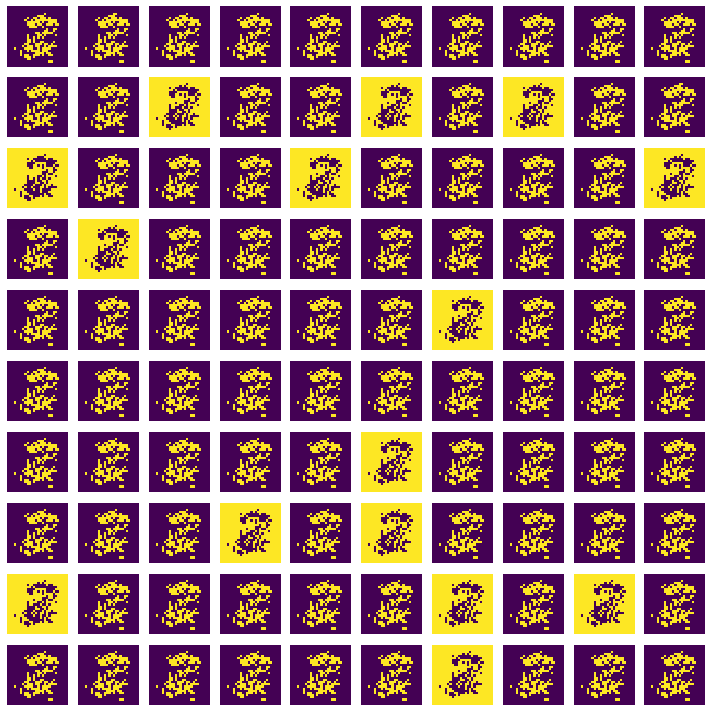

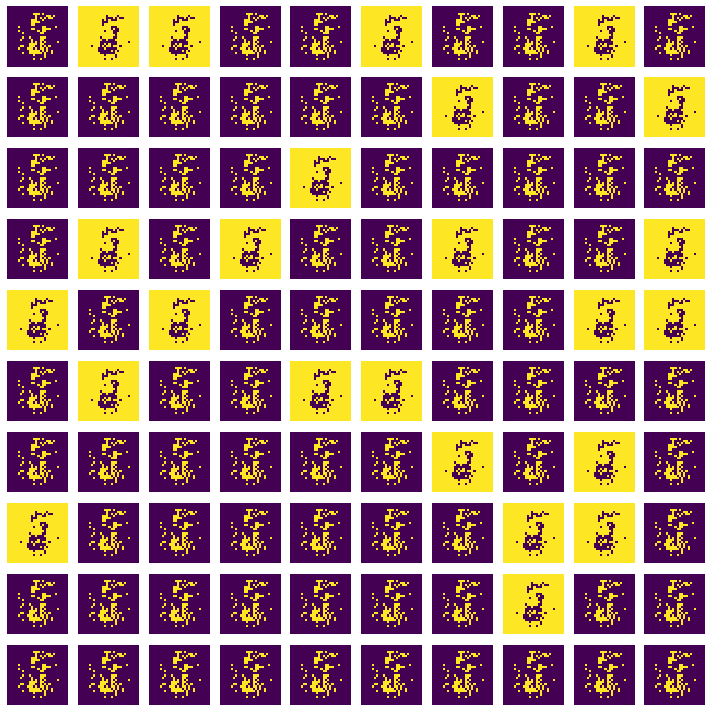

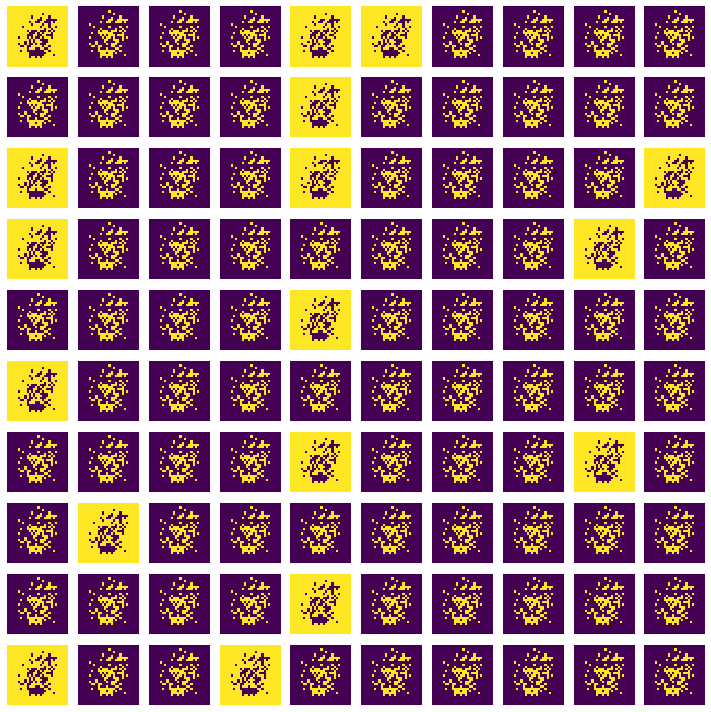

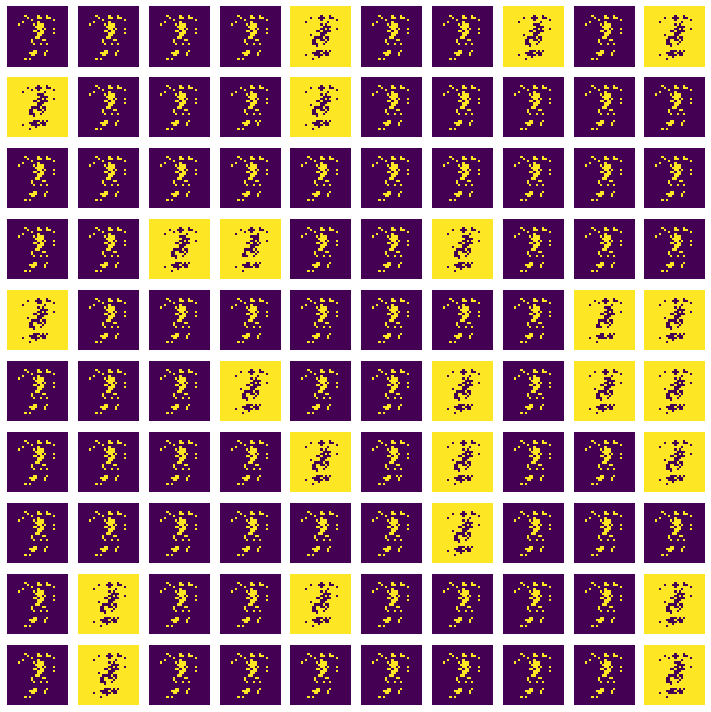

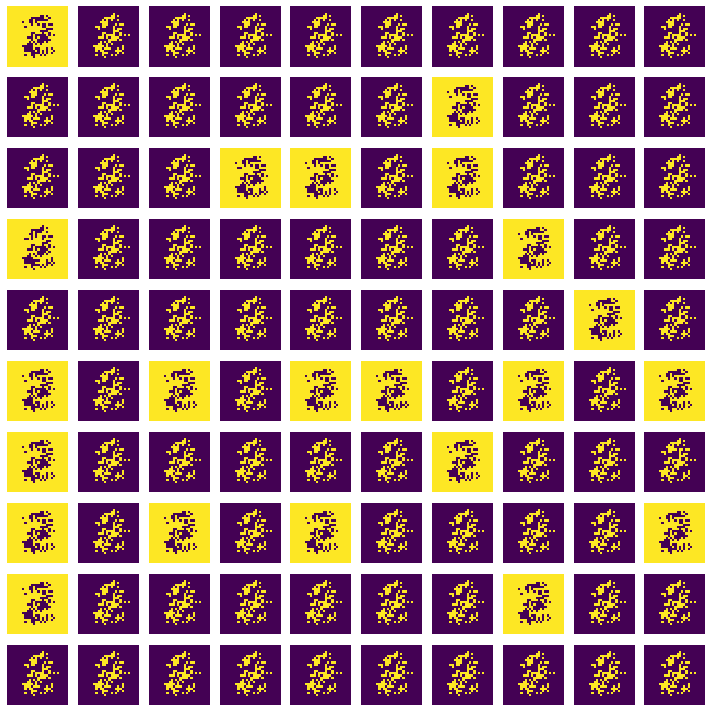

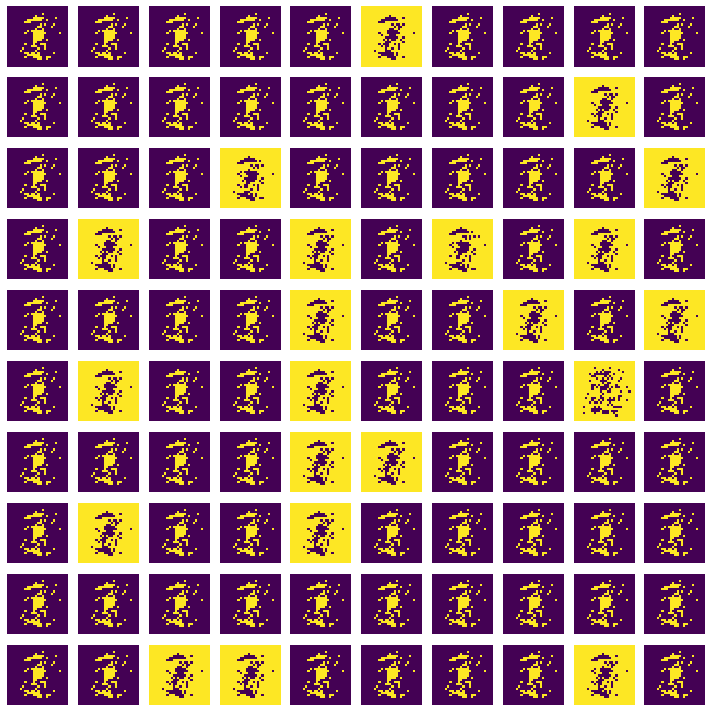

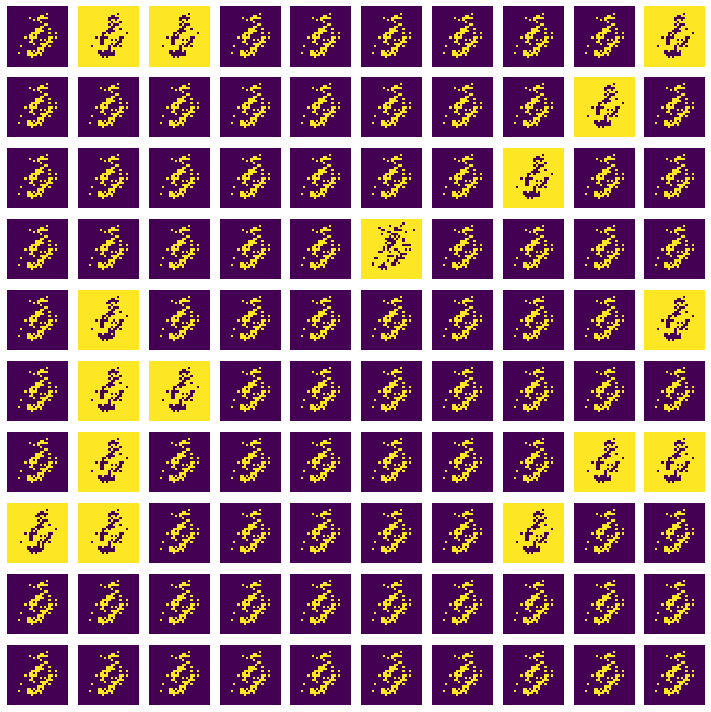

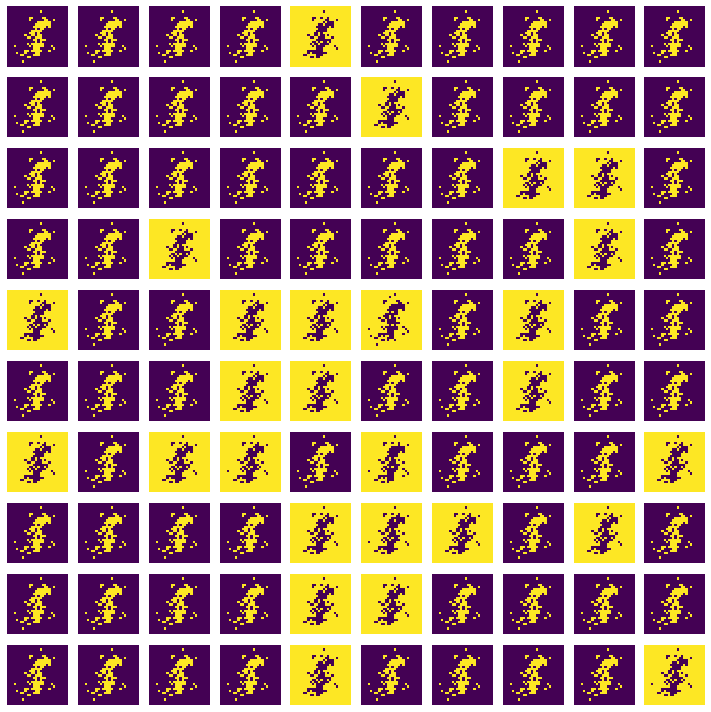

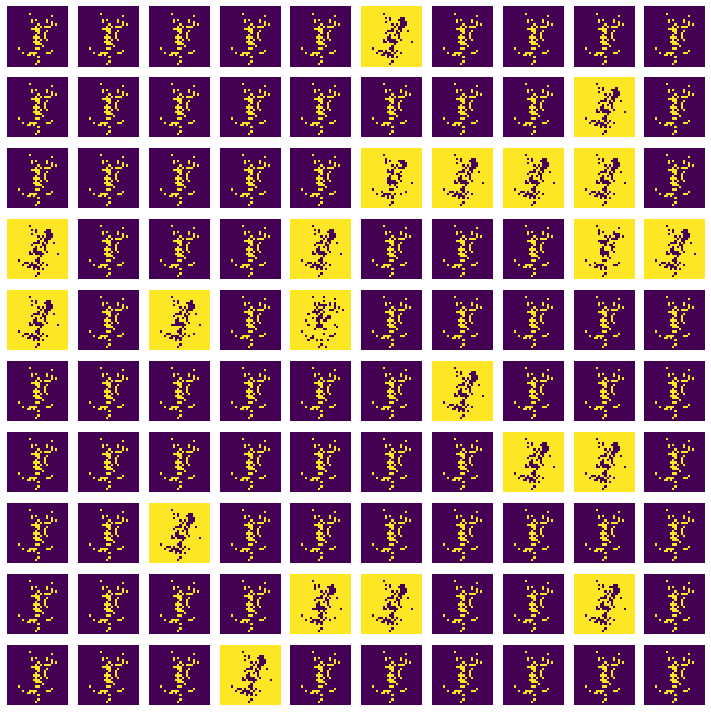

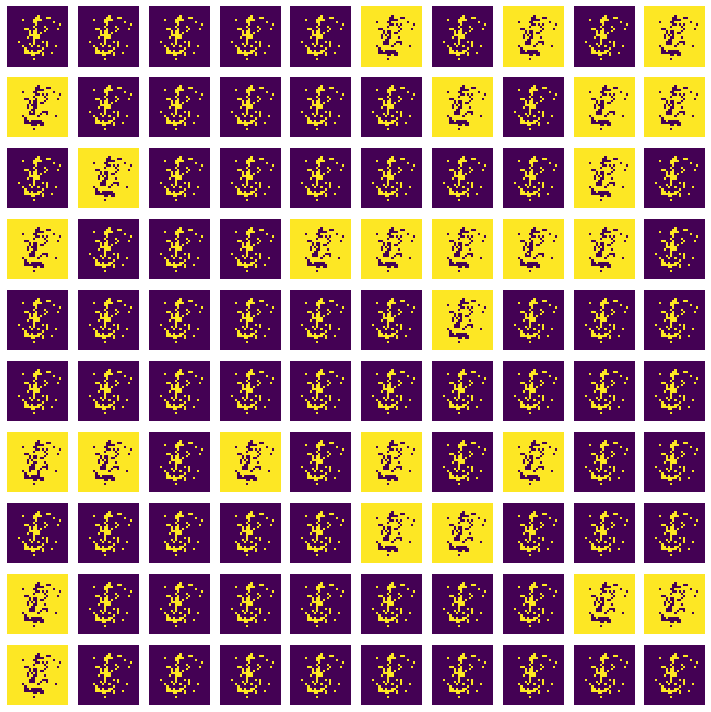

In [15]:
epochs = 400
for e in range(1, epochs+1):
    print(e, end=' ')
    if (e%20 == 0):
        print()
    
    for _ in range(batch_size):
        # random noise로 MNIST 가짜 이미지를 생성
        noise = np.random.normal(0, 1, [batch_size, 100])
        generated_images = generator.predict(noise)

        # 실제 이미지를 random하게 가져옴
        image_batch = X_train[np.random.randint(0, high=X_train.shape[0], size=batch_size)]

        # 실제와 가짜데이터로 batch 구성
        X = np.concatenate([image_batch, generated_images])

        # Generate한 것과 실제 데이터의 레이블
        y_dis = np.zeros(2*batch_size)
        y_dis[:batch_size]=0.9

        # Discriminator를 미리 학습시킴
        discriminator.trainable = True
        discriminator.train_on_batch(X, y_dis)

        # Generator의 노이즈가 있는 인풋을 실제 데이터로 취급
        y_gen = np.ones(batch_size)

        # GAN이 학습할 동안에는 Discriminator의 weight는 고정시켜야 함
        discriminator.trainable = False

        # GAN을 학습시킴
        gan.train_on_batch(noise, y_gen)

    if e==1 or e%20 == 0:
        plot_generated_images(e, generator)